In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop/CarPrice_Assignment.csv')
df

## uploading the csv file...

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.shape

##checking the size of the original dataset

(8128, 13)

#### checking the data...

In [5]:
df.duplicated().any()

#checking if there is some doplicates by getting a boolean answer.

True

In [6]:
df = df.drop_duplicates()
df.duplicated().any()

#Dropping the duplicated rows if there is...

False

In [7]:
df.drop(['torque'],axis=1, inplace = True)
df.head()

# i decided to delete this column because i didnt rlly know how to convert this data to a numerical data, and i dont think that
# it rlly a parameter that we can use.

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [8]:
df.isnull().sum()

## now we checking if there is an unnecessary data.

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

In [9]:
df.isnull().sum() / df.shape[0] * 100

# checks what percentage they constitute.

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.959861
seats            3.003176
dtype: float64

#### Because i have got a lot of data and this 'null' data is only on 3% i decide to delete the data.

In [10]:
df.dropna(axis=0, inplace=True)
df.isnull().any()

# delete the null data and checks for sure :)

<ipython-input-10-c05db1f5866f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool

In [11]:
df.shape

#checking agian the size of the data after the deleting...

(6718, 12)

### Prepares the data for the prediction process :

In [12]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


for doing our prediction we need to convert all our data to float data (numerical data). .\
that becaue the commends we using cannot read a strings data.

#### Converting the data into float format since they are numerical data

In [40]:
#lets check wich data is 'int' or 'float' and which is 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6714 non-null   object 
 1   year           6714 non-null   int64  
 2   selling_price  6714 non-null   int64  
 3   km_driven      6714 non-null   int64  
 4   fuel           6714 non-null   object 
 5   seller_type    6714 non-null   object 
 6   transmission   6714 non-null   object 
 7   owner          6714 non-null   object 
 8   mileage        6714 non-null   float64
 9   engine         6714 non-null   int64  
 10  max_power      6713 non-null   float64
 11  seats          6714 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 681.9+ KB


In [13]:
#converting our string to int by deleting the strings and convert the numbers to a int Dtype.

df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')
df['engine'] = df['engine'].str.strip('CC')
df['max_power'] = df['max_power'].str.strip('bhp').str.strip()

df.head()

#deleting the strings from those collumns.

<ipython-input-13-3bed0d5fddf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')
<ipython-input-13-3bed0d5fddf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = df['engine'].str.strip('CC')
<ipython-input-13-3bed0d5fddf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [14]:
df.info()

#check which data is an object and which is a num.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [15]:
df['mileage'] = pd.to_numeric(df['mileage'])
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'] = pd.to_numeric(df['max_power'])
df.head()

<ipython-input-15-e9efb701727d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = pd.to_numeric(df['mileage'])
<ipython-input-15-e9efb701727d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'] = pd.to_numeric(df['engine'])
<ipython-input-15-e9efb701727d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [16]:
df.info()

#check if the data rlly changed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   int64  
 10  max_power      6717 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 682.3+ KB


In [17]:
get_num = ['fuel', 'seller_type', 'transmission', 'owner']
dummies = pd.get_dummies(df[get_num], drop_first= True)

In [18]:
df_final = pd.concat([df, dummies],axis = 1)
df_final.drop(['fuel', 'seller_type', 'transmission','name', 'owner'], axis = 1, inplace = True)

df_final.head()

#every data that has been as string, it convert it to a '0' or '1' by adding all of the options that every collmun get.

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248,74.00,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.14,1498,103.52,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17.70,1497,78.00,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23.00,1396,90.00,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16.10,1298,88.20,5.0,0,0,1,1,0,1,0,0,0,0


### start the visualization

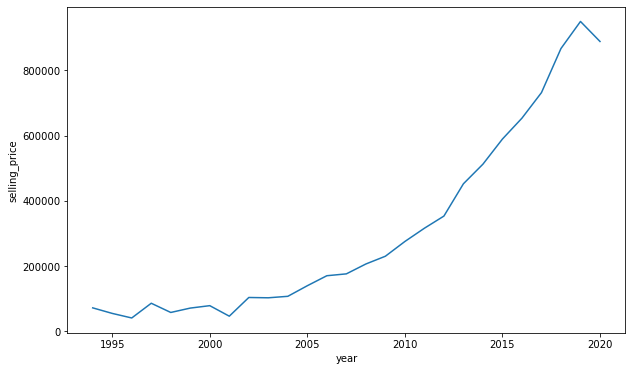

In [19]:
df.groupby('year').mean()['selling_price'].plot(kind = 'line', figsize=(10,6))
plt.ylabel('selling_price');

we can see that if the year increases the selling price is getting increase too.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

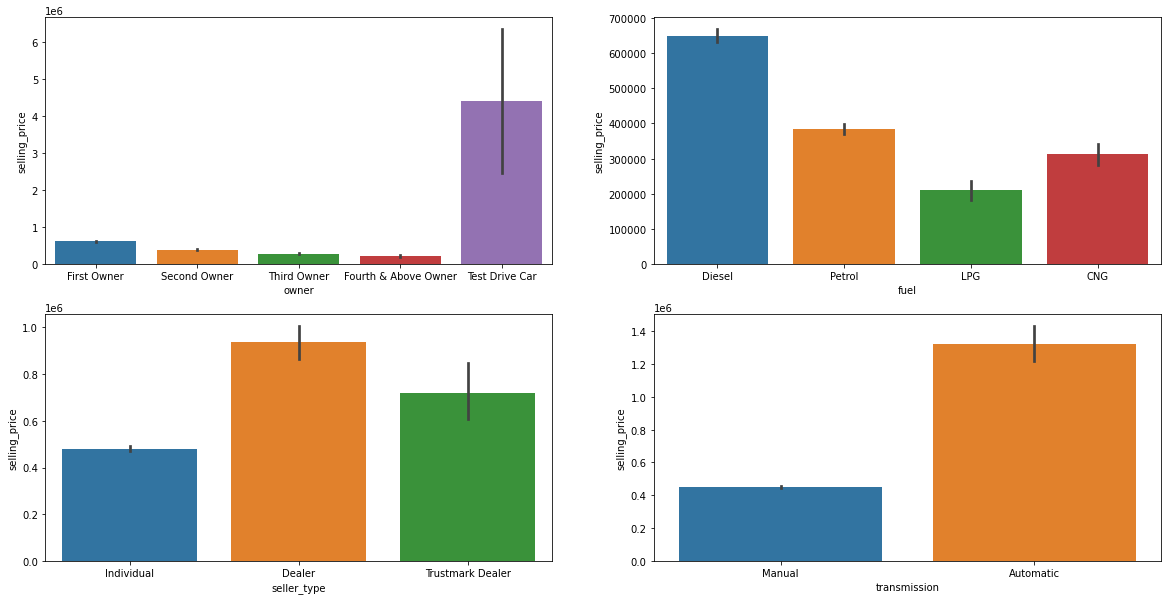

In [20]:
# plotting categorical variables vs target variable selling price
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)

sns.barplot(df.owner, df.selling_price)
plt.subplot(2,2,2)

sns.barplot(df.fuel, df.selling_price)
plt.subplot(2,2,3)

sns.barplot(df.seller_type, df.selling_price)
plt.subplot(2,2,4)

sns.barplot(df.transmission, df.selling_price)

plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


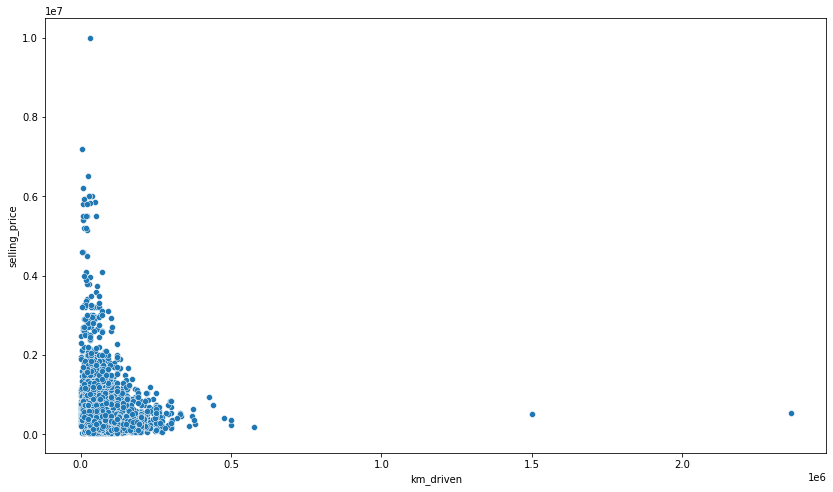

In [21]:
# km_driven vs selling_price
plt.figure(figsize=[14,8])
sns.scatterplot(df.km_driven, df.selling_price)
plt.show()

As we can see km_driven has 2 outliers, lets delete them from the dataset. .\
As we can see that if the km_driven increases the selling price is getting decreased.

In [22]:
df = df[df.km_driven < 1000000]

#deleting...

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


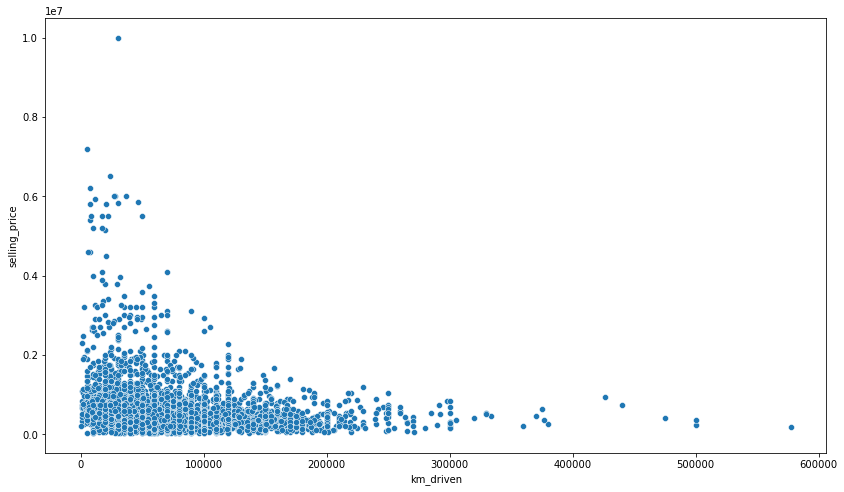

In [23]:
#checks if it really deleted

plt.figure(figsize=[14,8])
sns.scatterplot(df.km_driven, df.selling_price)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


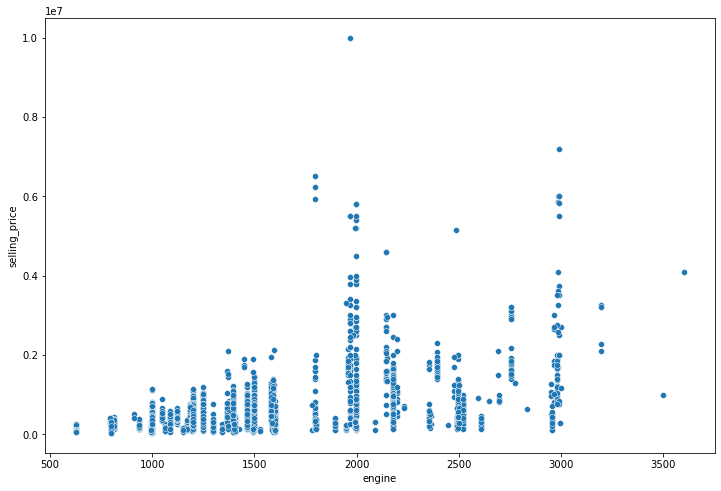

In [24]:
# engine vs selling_price

plt.figure(figsize=[12,8])
sns.scatterplot(df.engine, df.selling_price)
plt.show()

agian, we can see that we got 2 outliers, lets delete them from the dataset.

In [25]:
df = df[df.engine < 3400]

#deleting...

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


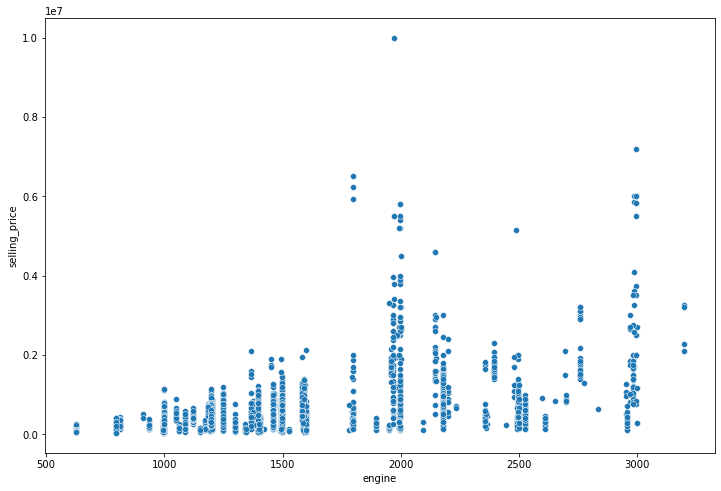

In [26]:
plt.figure(figsize=[12,8])
sns.scatterplot(df.engine, df.selling_price)
plt.show()

#checks if it really deleted

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


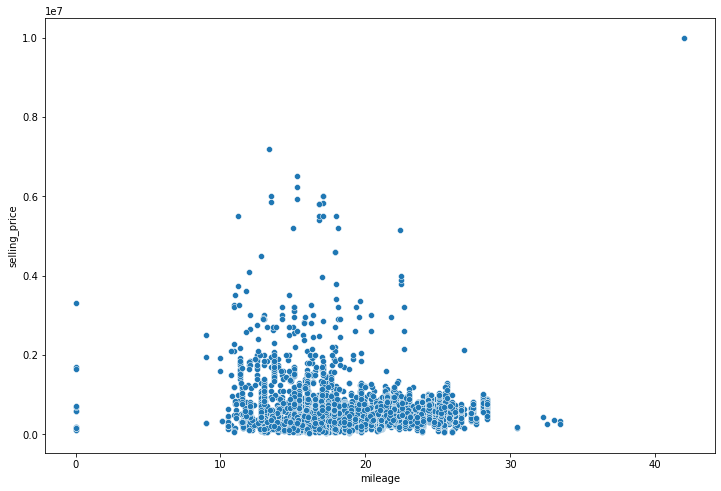

In [27]:
# mileage vs selling_price

plt.figure(figsize=[12,8])
sns.scatterplot(df.mileage, df.selling_price)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


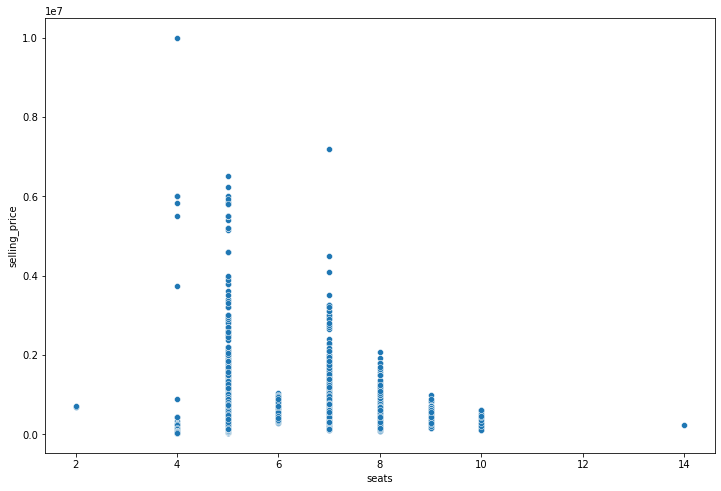

In [28]:
# seats vs selling_price
plt.figure(figsize=[12,8])
sns.scatterplot(df.seats, df.selling_price)
plt.show()

In [29]:
# looking at pair plot for numerical data
df_final.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,0.427367,-0.387796,0.366694,-0.019074,0.159889,0.023632,0.053710,-0.057422,-0.051088,-0.147291,0.046178,-0.144025,-0.207279,-0.285618,0.037721,-0.261576
selling_price,0.427367,1.000000,-0.161311,-0.108344,0.442857,0.692323,0.158111,0.254127,-0.043605,-0.242138,-0.260351,0.023273,-0.465548,-0.086409,-0.158421,0.202143,-0.127172
km_driven,-0.387796,-0.161311,1.000000,-0.196494,0.253339,0.041770,0.207957,0.279242,0.019054,-0.281084,0.125449,-0.040117,0.118983,0.084019,0.181498,-0.027327,0.133463
mileage,0.366694,-0.108344,-0.196494,1.000000,-0.578483,-0.378609,-0.459624,0.073907,-0.015875,-0.089208,-0.003617,-0.008957,0.173511,-0.082354,-0.103493,-0.017224,-0.103055
engine,-0.019074,0.442857,0.253339,-0.578483,1.000000,0.683506,0.657798,0.537399,-0.058730,-0.519497,-0.070554,-0.004825,-0.219556,0.003208,0.038484,0.016996,0.008032
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028,0.329291,-0.064873,-0.308052,-0.194538,0.018403,-0.441681,-0.027113,-0.032880,0.064090,-0.035223
seats,0.023632,0.158111,0.207957,-0.459624,0.657798,0.259028,1.000000,0.362029,-0.031961,-0.352091,0.038396,-0.023274,0.019423,0.007686,0.012428,-0.012053,-0.003645
fuel_Diesel,0.053710,0.254127,0.279242,0.073907,0.537399,0.329291,0.362029,1.000000,-0.079124,-0.974165,-0.021281,-0.055281,0.018261,-0.008757,0.045492,-0.018879,-0.008530
fuel_LPG,-0.057422,-0.043605,0.019054,-0.015875,-0.058730,-0.064873,-0.031961,-0.079124,1.000000,-0.064479,0.017746,-0.004597,0.022141,0.002651,0.009927,-0.001975,0.019280
fuel_Petrol,-0.051088,-0.242138,-0.281084,-0.089208,-0.519497,-0.308052,-0.352091,-0.974165,-0.064479,1.000000,0.013481,0.057085,-0.026287,0.008795,-0.047971,0.019641,0.007846


In [30]:
df_final.dropna(axis=0, inplace=True)

### Correlation table:

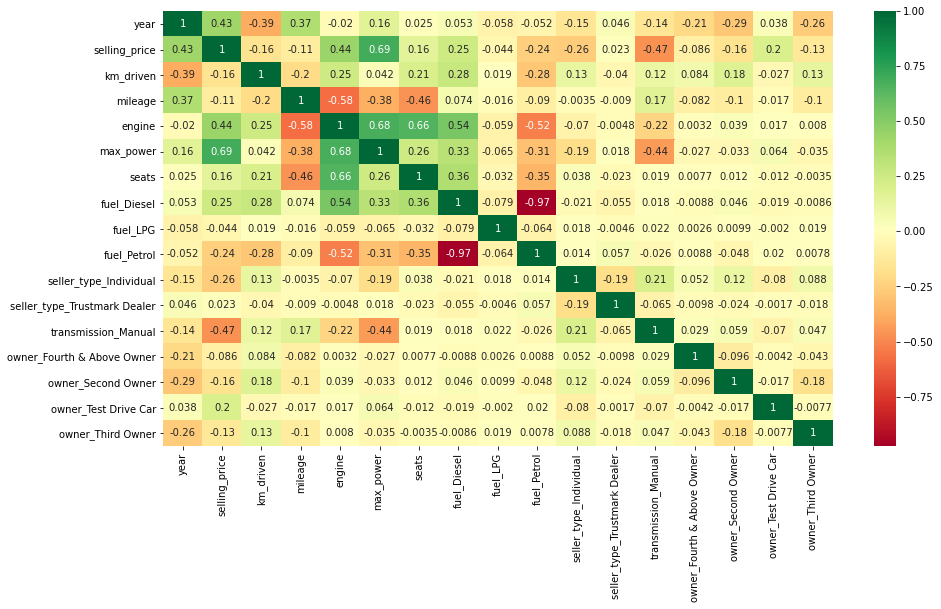

In [31]:
plt.figure(figsize = [15,8])
sns.heatmap(df_final.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

## Let's start the process of predicting

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [33]:
x = df_final.drop('selling_price', axis=1)
y = df_final['selling_price']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

### Linear Regression model

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

#r2 matric- This metric is not well-defined for single samples and will return a NaN value if n_samples is less than two.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(x)
r2score = r2_score(y, y_pred)
r2score



0.6403651691168155

### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(x)
r2score1 = r2_score(y, y_pred1)
r2score1

# taking the sum of the predicted 

0.95041294229445

### Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred2 = gbr.predict(x)
r2score2 = r2_score(y, y_pred2)
r2score2

0.9229086651620727

### for conclusion

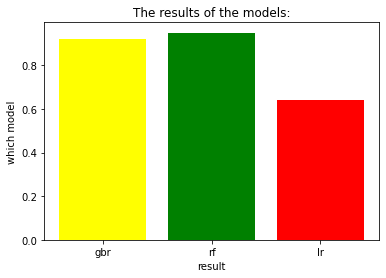

In [38]:
# x-coordinates of left sides of bars 
count = [1, 2, 3] 

# heights of bars 
results = [r2score2, r2score1, r2score]

# labels for bars 
names = ['gbr', 'rf', 'lr'] 

# plotting a bar chart 
plt.bar(count, results, tick_label = names, color = ['yellow', 'green', 'red']) 

# naming the x axis 
plt.xlabel('result') 

# naming the y axis 
plt.ylabel('which model') 
# plot title 

plt.title('The results of the models:') 

# function to show the plot 
plt.show() 


i would choose the 'Random Forest Regressor' model. that because it gives me the best result to my predict.